# Lập trình thống kê nâng cao với Python

# Bài 3: Ma trận chuyển đổi

### BS. Lê Ngọc Khả Nhi

# Nhập đề

Thân chào các bạn, trong bài hôm nay Nhi sẽ hướng dẫn các bạn viết code hoàn toàn thủ công bằng ngôn ngữ Python, để giải quyết một bài toán thống kê cho dữ liệu chuỗi rời rạc. Đại ý của bài toán này như sau: 

Cho một chuỗi gồm rất nhiều trạng thái của một biến (giá trị rời rạc) được ghi nhận qua nhiều thời điểm liên tiếp, mục tiêu của chúng ta là dùng thống kê để tìm ra quy luật chuyển đổi từ một trạng thái này sang trạng thái khác trong chuỗi dữ liệu này.

Những thí dụ thực tế của bài toán này trong y học như:

1) Sự thay đổi của một đại lượng sinh học (đo bằng giá trị rời rạc: thí dụ cân nặng, huyết áp, SpO2), theo dõi qua một khoảng thời gian dài

2) Sự biến đổi về độ nặng của một căn bệnh mạn tính trong thời gian dài, thí dụ Hen phế quản, COPD, 

3) Việc chuyển đổi giữa các loại thuốc điều trị

4) Hoạt động của cơ thể: Ngủ, vận động, làm việc, nghỉ ngơi, ăn uống,... trong ngày

Một cách đơn giản, Nhi lấy lại thí dụ về độ bão hòa Oxy máu động mạch (SpO2) ở bài trước: Giả định ta theo dõi SpO2 ở một bệnh nhân suy tim bằng một cảm biến với tần số 1 Hz, và kéo dài trong 1h và thu được chuỗi dữ liệu gồm 3600 giá trị như sau:

In [1]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bacsi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


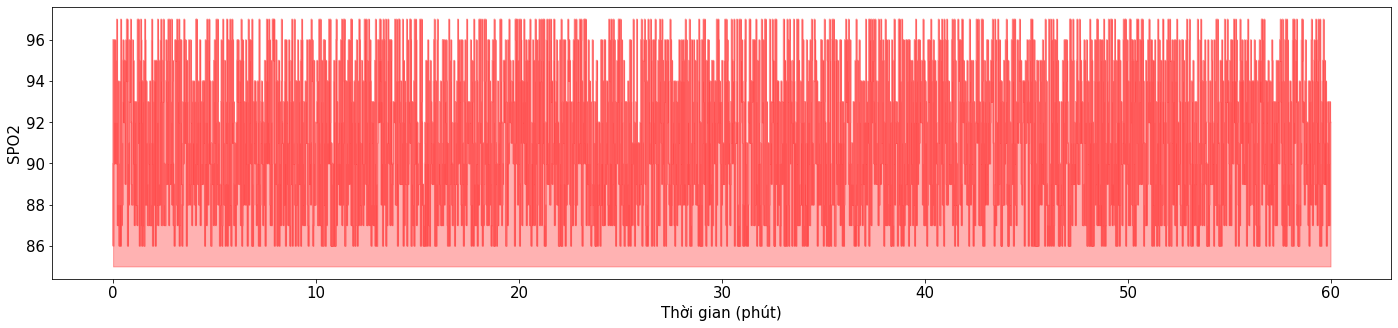

In [2]:
spo2 = np.random.randint(low = 86, high = 98, size = 3600)

matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(24,5))

plt.fill_between(np.arange(spo2.shape[0])/60,
                 np.repeat(85, spo2.shape[0]),
                 spo2, 
                 step="pre", 
                 alpha=0.3, 
                 color = 'red')
plt.xlabel('Thời gian (phút)')
plt.ylabel('SPO2')

plt.plot(np.arange(spo2.shape[0])/60,spo2, drawstyle="steps", color = 'red', alpha = 0.4)

# Mục tiêu và giải pháp

Ước tính xác suất chuyển đổi từ một giá trị SpO2 tại thời điểm t sang một giá trị khác ở thời điểm 1 giây tiếp theo: t+1; và trình bày kết quả trên một ma trận, gọi là ma trận chuyển đổi (transition matrix)


Có nhiều giải pháp cho bài toán này, thí dụ cách thứ 1

## Cách 1: sử dụng islice của itertools và method groupby của pandas

Ta lần lượt làm 3 bước: 

1) Viết hàm để tạo ra một generator, xuất ra 1 tuple (giá trị trước, giá trị sau)

2) Chạy hàm này trên chuỗi Spo2, và lưu kết quả thành pandas dataframe

3) Sử dụng method groupby và phép đếm tần suất

Đến đây, ta đã có ma trận tần suất dưới dạng dataframe, index là trước, columns là sau)

4) Chuyển tần suất thành xác suất, bằng cách chia mỗi ô cho tổng của mỗi hàng

In [3]:
from itertools import islice

def slide_window(seq):
    '''Hàm này tạo một cửa sổ trượt với kích thước = 2 trên chuỗi dữ liệu
    # args(list, np.array) seq = chuỗi dữ liệu, datatype nào cũng được
    # output: generator xuất dữ liệu là tuple(vị trí Trước, Sau)
    '''
    
    segments = iter(seq)
    obs = tuple(islice(segments, 2))
    if len(obs) == 2:
        yield obs
    for item in segments:
        obs = obs[1:] + (item,)
        yield obs

In [4]:
pairs = pd.DataFrame(slide_window(spo2), 
                     columns=['Trước', 'Sau'])

counts = pairs.groupby('Trước')['Sau'].value_counts()

t_mat = counts.unstack()

t_mat = t_mat.div(t_mat.sum(axis=1), axis=0) # Chuyển tần suất thành xác suất

t_mat

Sau,86,87,88,89,90,91,92,93,94,95,96,97
Trước,,,,,,,,,,,,
86,0.074576,0.094915,0.108475,0.084746,0.091525,0.081356,0.077966,0.081356,0.064407,0.088136,0.081356,0.071186
87,0.082237,0.088816,0.062500,0.095395,0.082237,0.108553,0.075658,0.069079,0.108553,0.069079,0.075658,0.082237
88,0.097122,0.093525,0.089928,0.086331,0.068345,0.071942,0.075540,0.111511,0.089928,0.064748,0.086331,0.064748
89,0.090253,0.050542,0.083032,0.064982,0.079422,0.097473,0.075812,0.108303,0.086643,0.086643,0.097473,0.079422
90,0.078947,0.092105,0.072368,0.088816,0.069079,0.082237,0.085526,0.101974,0.085526,0.069079,0.095395,0.078947
91,0.071197,0.071197,0.122977,0.093851,0.080906,0.090615,0.071197,0.087379,0.074434,0.058252,0.093851,0.084142
92,0.091837,0.105442,0.051020,0.071429,0.085034,0.074830,0.068027,0.108844,0.074830,0.078231,0.102041,0.088435
93,0.052632,0.099071,0.058824,0.071207,0.111455,0.077399,0.092879,0.095975,0.086687,0.083591,0.111455,0.058824
94,0.083871,0.083871,0.061290,0.080645,0.100000,0.083871,0.109677,0.070968,0.077419,0.064516,0.083871,0.100000


Cách này mất 0.009 giây, tốc độ nhanh như vậy là nhờ dùng numpy array, pandas và generator (yield)

In [5]:
import time

start = time.perf_counter()

pairs = pd.DataFrame(slide_window(spo2), 
                     columns=['Trước', 'Sau'])
counts = pairs.groupby('Trước')['Sau'].value_counts()
t_mat = counts.unstack()

t_mat = t_mat.div(t_mat.sum(axis=1), axis=0) 

end = time.perf_counter()

print(f'Mất {round(end - start, 3)} giây')

Mất 0.009 giây


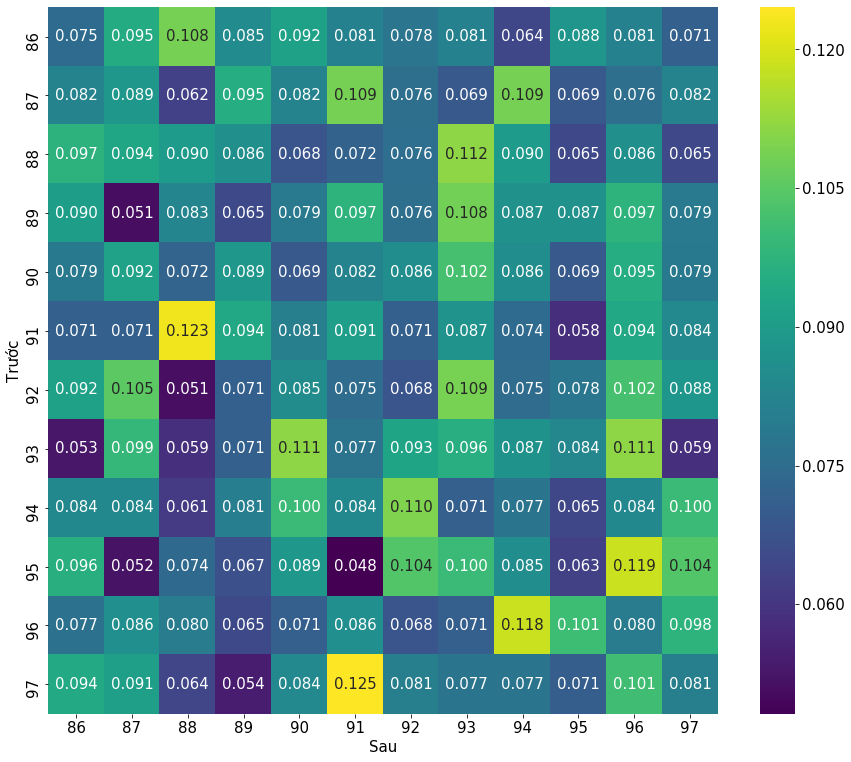

In [6]:
plt.rcParams['figure.figsize'] = (15,13)

sns.heatmap(t_mat, cmap = 'viridis', annot=True, fmt=".3f")

## Cách thứ 2: Sử dụng Counter của collections

Cách này ngắn gọn hơn và cũng rất hiệu quả, do lợi dụng hàm Counter của module collections, cho phép rút ngắn phép thống kê đếm tần suất các cặp chuyển đổi

1) Bước 1: Tạo sẵn 1 dataframe k hàng x k cột với k là  số lượng bậc giá trị có thể trong chuỗi

2) Áp dụng Counter trên 1 list dữ liệu bắt cặp so le spo2 và spo2[1:] (dùng zip)

Kết quả sẽ là 1 dictionary thuộc class Counter

3) Mở gói dictionary Counter này và phân phát lần lượt vào từng ô trong dataframe, ta sẽ có ma trận chuyển đổi dạng tần suất

4) Chuyển tần suất thành xác suất, bằng cách chia mỗi ô cho tổng của mỗi hàng

In [7]:
from collections import Counter

k = len(np.unique(spo2))

t_mat2 = pd.DataFrame(np.zeros([k,k]), 
                 columns = np.unique(spo2),
                 index = np.unique(spo2))

count_dict = Counter(zip(spo2, spo2[1:]))

for x,y in zip(list(count_dict.keys()), list(count_dict.values())):
    t_mat2.loc[x[0],x[1]] = y

t_mat2 = t_mat2.div(t_mat2.sum(axis=1), axis=0)

t_mat2

,86,87,88,89,90,91,92,93,94,95,96,97
86,0.074576,0.094915,0.108475,0.084746,0.091525,0.081356,0.077966,0.081356,0.064407,0.088136,0.081356,0.071186
87,0.082237,0.088816,0.062500,0.095395,0.082237,0.108553,0.075658,0.069079,0.108553,0.069079,0.075658,0.082237
88,0.097122,0.093525,0.089928,0.086331,0.068345,0.071942,0.075540,0.111511,0.089928,0.064748,0.086331,0.064748
89,0.090253,0.050542,0.083032,0.064982,0.079422,0.097473,0.075812,0.108303,0.086643,0.086643,0.097473,0.079422
90,0.078947,0.092105,0.072368,0.088816,0.069079,0.082237,0.085526,0.101974,0.085526,0.069079,0.095395,0.078947
91,0.071197,0.071197,0.122977,0.093851,0.080906,0.090615,0.071197,0.087379,0.074434,0.058252,0.093851,0.084142
92,0.091837,0.105442,0.051020,0.071429,0.085034,0.074830,0.068027,0.108844,0.074830,0.078231,0.102041,0.088435
93,0.052632,0.099071,0.058824,0.071207,0.111455,0.077399,0.092879,0.095975,0.086687,0.083591,0.111455,0.058824
94,0.083871,0.083871,0.061290,0.080645,0.100000,0.083871,0.109677,0.070968,0.077419,0.064516,0.083871,0.100000
95,0.096296,0.051852,0.074074,0.066667,0.088889,0.048148,0.103704,0.100000,0.085185,0.062963,0.118519,0.103704


Cách này cũng rất nhanh, như cách thứ nhất

In [8]:
import time

k = len(np.unique(spo2))

t_mat2 = pd.DataFrame(np.zeros([k,k]), 
                 columns = np.unique(spo2),
                 index = np.unique(spo2))

count_dict = Counter(zip(spo2, spo2[1:]))

for x,y in zip(list(count_dict.keys()), list(count_dict.values())):
    t_mat2.loc[x[0],x[1]] = y

t_mat2 = t_mat2.div(t_mat2.sum(axis=1), axis=0)

print(f'Mất {round(end - start, 3)} giây')

Mất 0.009 giây


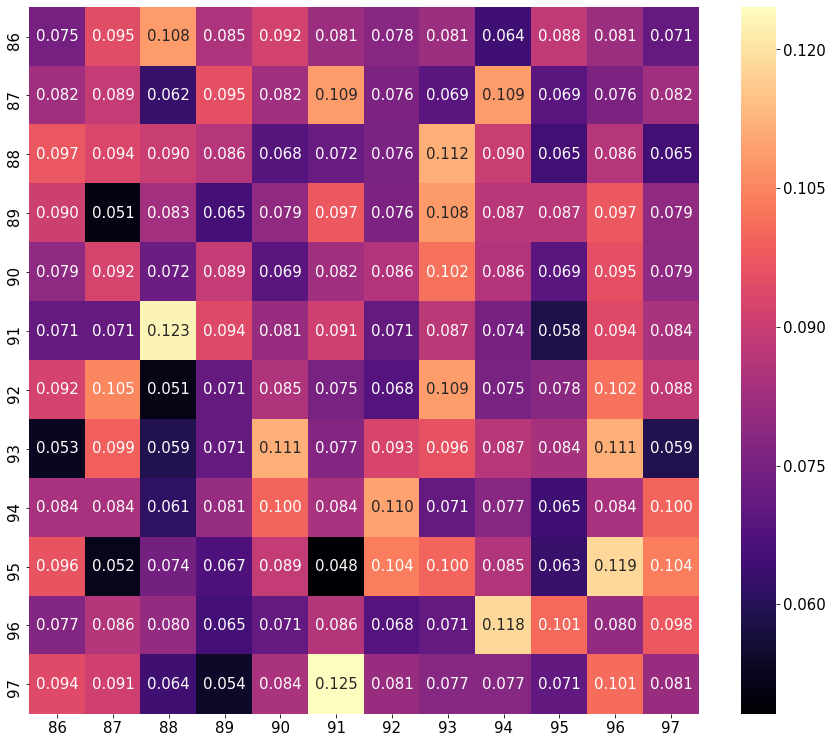

In [9]:
sns.heatmap(t_mat2, cmap = 'magma', annot=True, fmt=".3f")

## Cách thứ 3: Dùng method crosstab của pandas dataframe

Cách này cực kì nhanh chóng, vì ma trận chuyển đổi có bản chất là 1 bảng chéo (cross-table), nên ta dùng ngay method crosstable của pandas để tạo ra nó.

Bước 1) Tạo cross-table, 

Bước 2) Chuyển tần suất thành xác suất, bằng cách chia mỗi ô cho tổng của mỗi hàng

In [10]:
t_mat3 = pd.crosstab(pd.Series(spo2,name='Trước'),
                      pd.Series(spo2[1:],name='Sau'),
                      normalize=False)

t_mat3 = t_mat3.div(t_mat3.sum(axis=1), axis=0)

t_mat3

Sau,86,87,88,89,90,91,92,93,94,95,96,97
Trước,,,,,,,,,,,,
86,0.074576,0.094915,0.108475,0.084746,0.091525,0.081356,0.077966,0.081356,0.064407,0.088136,0.081356,0.071186
87,0.082237,0.088816,0.062500,0.095395,0.082237,0.108553,0.075658,0.069079,0.108553,0.069079,0.075658,0.082237
88,0.097122,0.093525,0.089928,0.086331,0.068345,0.071942,0.075540,0.111511,0.089928,0.064748,0.086331,0.064748
89,0.090253,0.050542,0.083032,0.064982,0.079422,0.097473,0.075812,0.108303,0.086643,0.086643,0.097473,0.079422
90,0.078947,0.092105,0.072368,0.088816,0.069079,0.082237,0.085526,0.101974,0.085526,0.069079,0.095395,0.078947
91,0.071197,0.071197,0.122977,0.093851,0.080906,0.090615,0.071197,0.087379,0.074434,0.058252,0.093851,0.084142
92,0.091837,0.105442,0.051020,0.071429,0.085034,0.074830,0.068027,0.108844,0.074830,0.078231,0.102041,0.088435
93,0.052632,0.099071,0.058824,0.071207,0.111455,0.077399,0.092879,0.095975,0.086687,0.083591,0.111455,0.058824
94,0.083871,0.083871,0.061290,0.080645,0.100000,0.083871,0.109677,0.070968,0.077419,0.064516,0.083871,0.100000


Cách thứ 3 cũng nhanh tương đương 2 cách trên, mất 0.009 giây

In [11]:
import time

t_mat3 = pd.crosstab(pd.Series(spo2,name='Trước'),
                      pd.Series(spo2[1:],name='Sau'),
                      normalize=False)

t_mat3 = t_mat3.div(t_mat3.sum(axis=1), axis=0)

print(f'Mất {round(end - start, 3)} giây')

Mất 0.009 giây


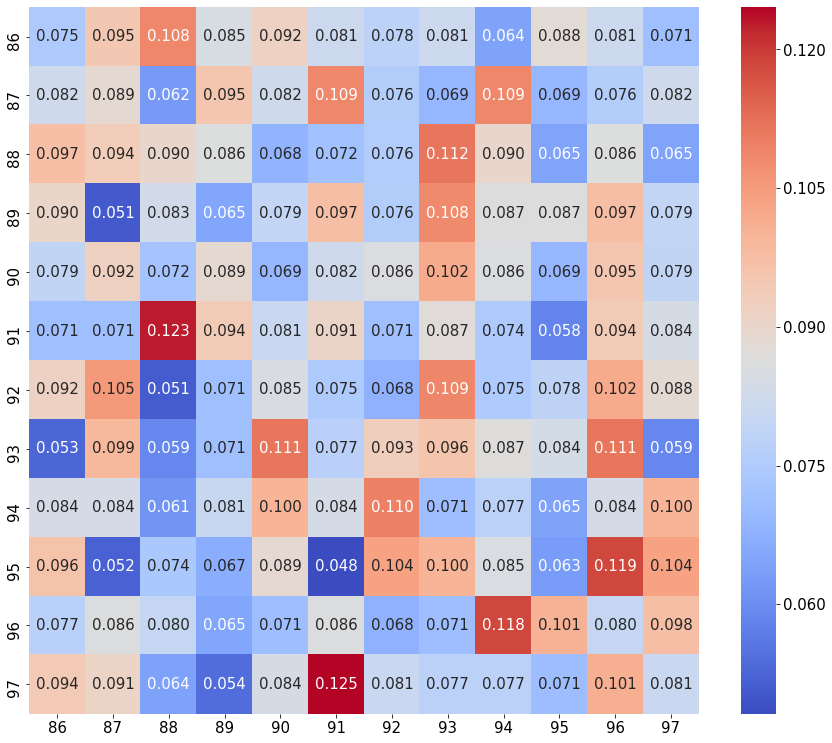

In [12]:
sns.heatmap(t_mat2, cmap = 'coolwarm', annot=True, fmt=".3f")

# Biểu diễn kết quả bằng sơ đồ định hướng (Directed graph)

Thứ mà chúng ta vừa tạo ra (ma trận chuyển đổi) có liên hệ rất gần với lý thuyết về chuỗi Markov:
https://en.wikipedia.org/wiki/Markov_chain; và mô hình Markov ẩn (HMM). 

Ma trận này chứa thông tin về quy luật chuyển đổi từ vị trí t sang t+1, nghĩa là tại 1 thời điểm bất kì, nếu ta biết trạng thái X tại thời điểm t, ta có thể biết xác suất chuyển từ X sang 1 trạng thái Y,Z... ở ngay sau đó (t+1).

Ma trận chuyển đổi thực ra rất khó đọc, nên ta cần 1 hình thức hiệu quả hơn trình bày kết quả, đó là dùng sơ đồ định hướng (Directed graph):

Ta có thể vẽ directed graph bằng thư viện pygraphviz

In [23]:
def graph_tmat(t_mat):
    
    from graphviz import Digraph
    
    prob = t_mat.values
    nodes = [str(i) for i in t_mat.index]
    
    problist = list()

    for i, node in enumerate(nodes):
        problist.append(prob[i, prob_matrix_sorted[i, -1]])
        problist.append(prob[i, prob_matrix_sorted[i, -2]])
        
    problist.sort()
    
    edge_pal = sns.color_palette('coolwarm', len(problist)).as_hex()
    edge_col_pal = {p:c for p,c in zip(problist, edge_pal)}
    
    pal = sns.color_palette('coolwarm', len(nodes)).as_hex()

    graph = Digraph()

    for i, node in enumerate(nodes):
        graph.node(
            node, node, 
            style='filled', 
            fillcolor=pal[i],
            color = 'black',
            fontname='Helvetica', 
            penwidth='1', 
            fontcolor='black')

        first_trans = nodes[prob_matrix_sorted[i, -1]]
        most_prob = prob[i, prob_matrix_sorted[i, -1]]

        graph.edge(node, first_trans,
                   label=f'{most_prob:.3f}',
                   fontname='Helvetica', 
                   fontsize = '15',
                   penwidth=str(3*most_prob),
                   color=edge_col_pal[most_prob],
                   arrowsize='1')

        second_prob = prob[i, prob_matrix_sorted[i, -2]]

        sec_trans = nodes[prob_matrix_sorted[i, -2]]
        graph.edge(
                node, sec_trans,
                label=f'{second_prob:.3f}',
                fontname='Helvetica', 
            penwidth=str(4*second_prob),
                fontsize='10', 
            color=edge_col_pal[second_prob], 
            arrowsize='0.75'
            )
        if node != first_trans and node != sec_trans:
            graph.edge(
                    node, node,
                    label=f'{prob[i, i]:.2f}',
                    fontname='Helvetica', penwidth='1',
                    fontsize='10', 
                color='#cfd8dc', 
                arrowsize='0.5'
                )
            
    return graph

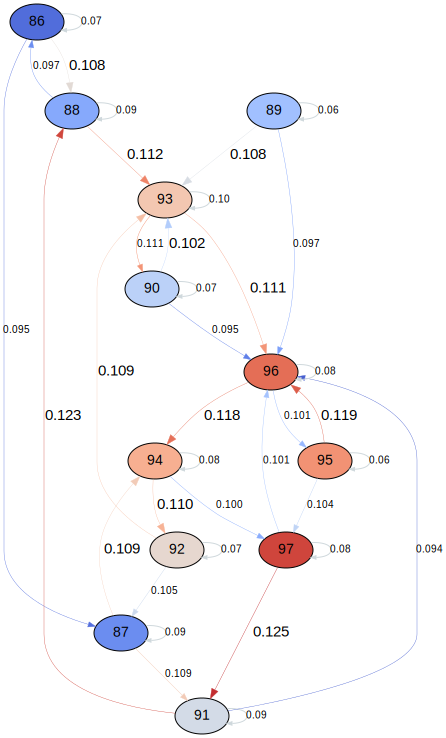

In [24]:
graph_tmat(t_mat)

Bài thực hành đến đây là hết, hy vọng các bạn có thể ứng dụng bài toán này cho các vấn đề của bản thân. Nếu có hứng thú, các bạn có thể đi xa hơn khi tìm hiểu về mô hình Markov ẩn (HMM) cho phép học thông tin từ nhiều chuỗi trạng thái, nhằm xây dựng quy luật dưới dạng chuỗi Markov.  